In [48]:
import pandas as pd
import seaborn as sns
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
STOPWORDS= set(stopwords.words('english'))




In [2]:
url="/Users/alvintung/Desktop/Python_Project/Sentiment_Analysis_Amazon/amazon_alexa.tsv"

df=pd.read_csv(url,delimiter='\t',quoting=3)

df.shape

df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [3]:
#columns name

print(f'Columns name : {df.columns}')

Columns name : Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [4]:
#check for null values

df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [5]:
#verify the null value

df[df['verified_reviews'].isnull()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [6]:
#drop the null values

df=df.dropna()

df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
 #Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column
 
df['length']=df['verified_reviews'].apply(len)

df

/var/folders/9b/hnddwhgx6vd7l4y7fscx56nh0000gn/T/ipykernel_74842/101865471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['verified_reviews'].apply(len)


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382


In [8]:
#randomly checking for 10th records

print(f'verified_review : columns_name {df['verified_reviews'].iloc[10]}')
print(f'length of review : {len(df.iloc[10]['verified_reviews'])}')
print(f'length of column value : {df['length'].iloc[10]}')

verified_review : columns_name "I sent it to my 85 year old Dad, and he talks to it constantly."
length of review : 65
length of column value : 65


In [9]:
#datatype of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [10]:
#Analyzing rating columns, how satisfy does the customer is

df_rating=df.copy()

df_rating['rating'].value_counts().sort_index(ascending=True)

rating
1     161
2      95
3     152
4     455
5    2286
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

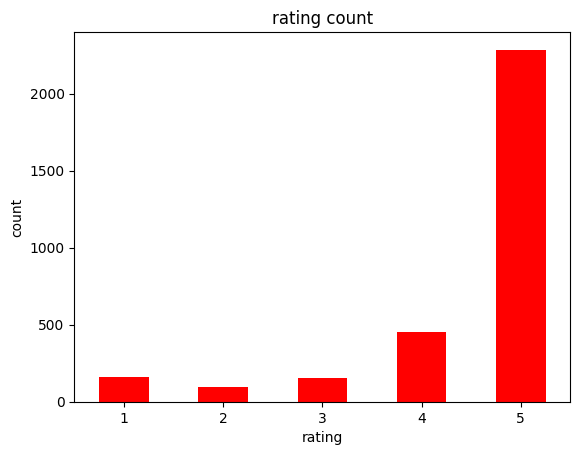

In [11]:
#Bar plot to visualize the total counts of each rating

import matplotlib.pyplot as plt


df_rating['rating'].value_counts().sort_index(ascending=True).plot.bar(color='red')
plt.title('rating count')
plt.xlabel('rating')
plt.ylabel('count')
plt.xticks(rotation=0)



In [12]:
#Finding the percentage distribution of each rating - we will divide the number of records for each rating by total number of records

percentage_distribution= round(df['rating'].value_counts() / df.shape[0]*100,2)



print(f'percentage distribution : {percentage_distribution.sort_index(ascending=False)}')



percentage distribution : rating
5    72.59
4    14.45
3     4.83
2     3.02
1     5.11
Name: count, dtype: float64


<Axes: ylabel='Percentage of distribution'>

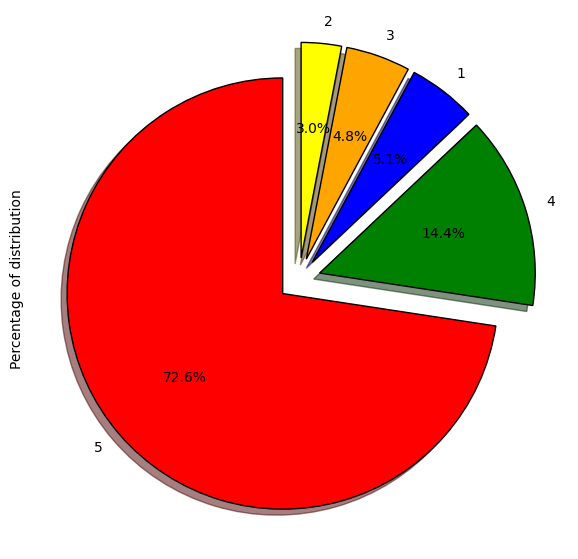

In [13]:
#Lets plot a pie chart

fig=plt.figure(figsize=(7,7))

colors = ('red','green','blue','orange','yellow')

wp ={'linewidth':1, "edgecolor":'black'}
tags=df_rating['rating'].value_counts()/df_rating.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage of distribution')

In [14]:
#Analyzing 'feedback' column

df_feedback=df.copy()

df_feedback['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [15]:
review_1=df[df_feedback['feedback']==1].iloc[0:5]['verified_reviews']
review_0=df[df_feedback['feedback']==0].iloc[0:5]['verified_reviews']
review_1
review_0

46     "It's like Siri, in fact, Siri answers more ac...
111    Sound is terrible if u want good music too get...
141                                   Not much features.
162    "Stopped working after 2 weeks ,didn't follow ...
176                                 Sad joke. Worthless.
Name: verified_reviews, dtype: object

1 is positive feedback

0 is negative feedback


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

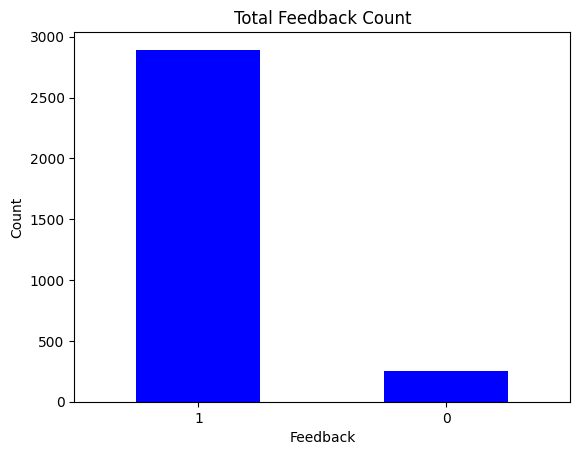

In [16]:
#Bar graph to visualize the toal counts of each feedback

df_feedback['feedback'].value_counts().plot.bar(color='blue')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Total Feedback Count')
plt.xticks(rotation=0)

In [17]:
feedback_percentage_distribution= round(df_feedback['feedback'].value_counts()/ df_feedback.shape[0],2)

feedback_percentage_distribution



feedback
1    0.92
0    0.08
Name: count, dtype: float64

<Axes: ylabel='Percentage of distribution'>

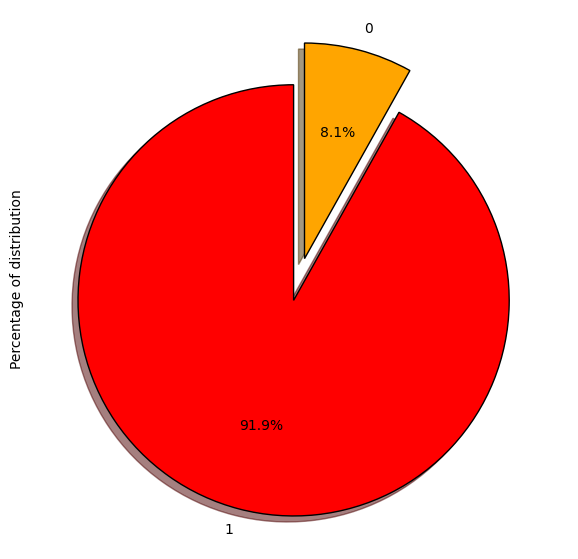

In [18]:
#Lets plot a pie chart

fig=plt.figure(figsize=(7,7))

colors = ('red','orange')

wp ={'linewidth':1, "edgecolor":'black'}
tags=df_feedback['feedback'].value_counts()/df_feedback.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage of distribution')

In [19]:
#Lets see the rating values for different of 'feedback'ArithmeticError
#Feedback =0
df[df['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [20]:
#Feedback =1 
df[df['feedback']==1]['rating'].value_counts()


rating
5    2286
4     455
3     152
Name: count, dtype: int64

Analyzing 'variation' columns

In [21]:
#Distinct values of 'variation' and its count

df_variation=df.copy()

df_variation['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

Text(0, 0.5, 'Count')

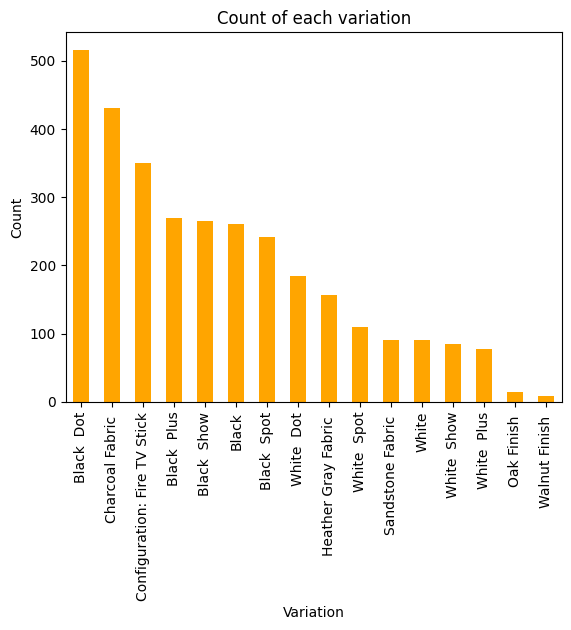

In [22]:
#Bar graph to visualize the total counts of each variation
df_variation['variation'].value_counts().plot.bar(color='orange')
plt.title('Count of each variation')
plt.xlabel('Variation')
plt.ylabel('Count')

In [23]:
#percentage distribution

variation_percentage_distribution=round(df_variation['variation'].value_counts()/df_variation.shape[0]*100,2)

variation_percentage_distribution

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

In [24]:
#Mean rating according to variation

df_variation.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Text(0, 0.5, 'Count')

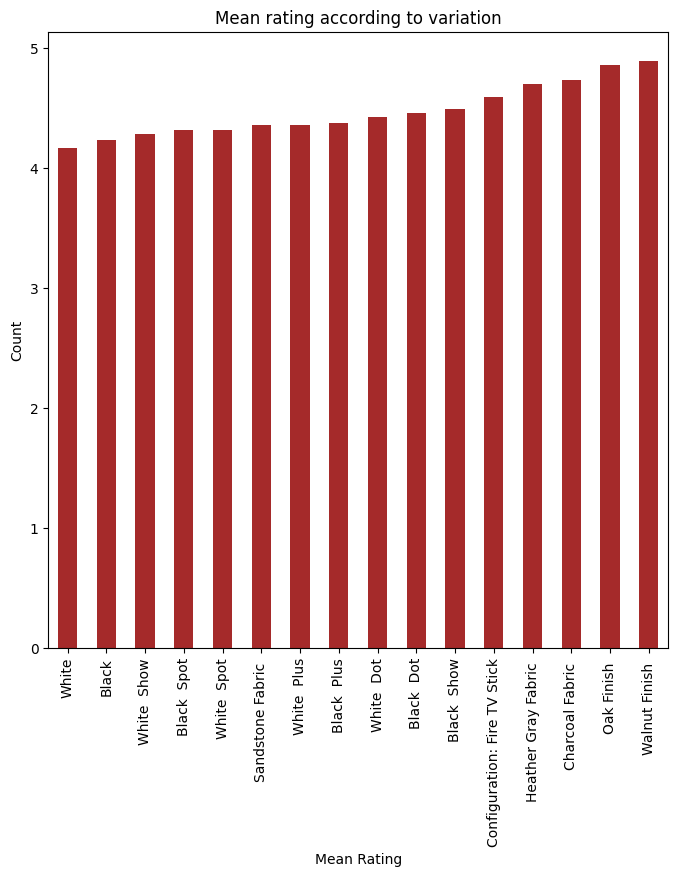

In [25]:
df_variation_groupby=df_variation.groupby('variation')['rating'].mean()
plt.figure(figsize=(8,8))
df_variation_groupby.sort_values(ascending=True).plot.bar(color='brown')
plt.title('Mean rating according to variation')
plt.xlabel('Mean Rating')
plt.ylabel('Count')


Analyzing verified_reviews' column

In [26]:
df['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

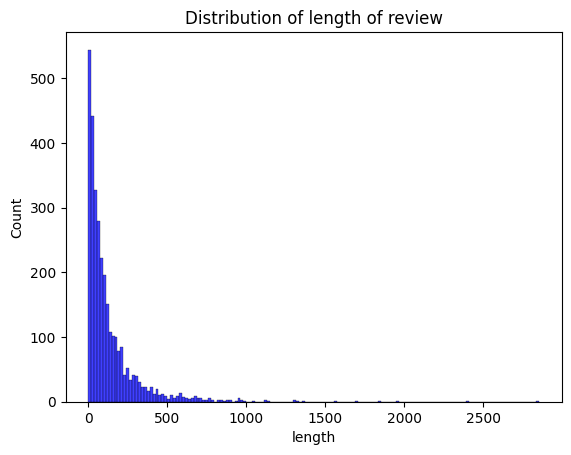

In [27]:
sns.histplot(df['length'],color='blue').set(title='Distribution of length of review')

Length analysis when feedback is 0 (negative)

[Text(0.5, 1.0, 'Distribution of length review when feedback is 0')]

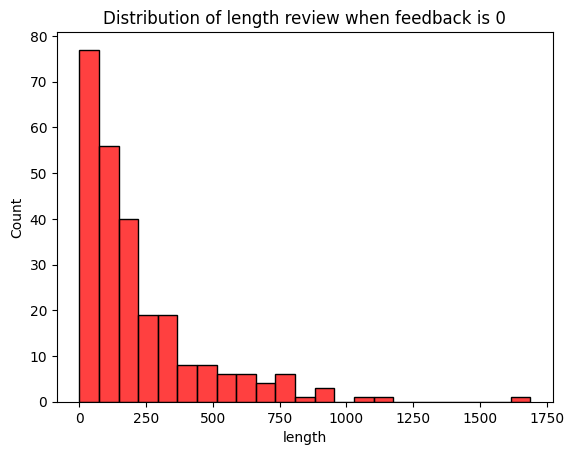

In [28]:
length_feedback_zero = df[df['feedback']==0]['length']

sns.histplot(length_feedback_zero,color='red').set(title='Distribution of length review when feedback is 0')

[Text(0.5, 1.0, 'Distribution of length review when feedback is 1')]

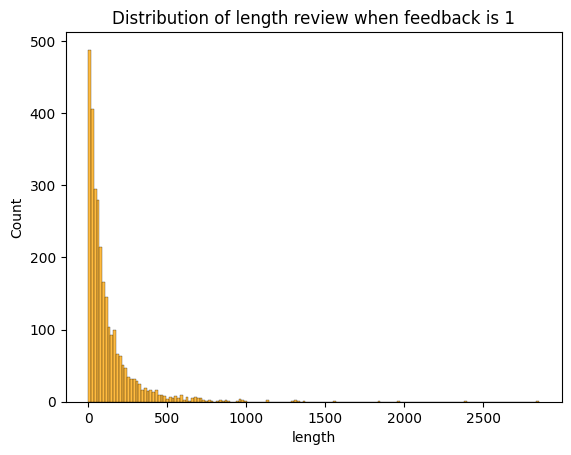

In [29]:
length_feedback_one = df[df['feedback']==1]['length']

sns.histplot(length_feedback_one,color='orange').set(title='Distribution of length review when feedback is 1')

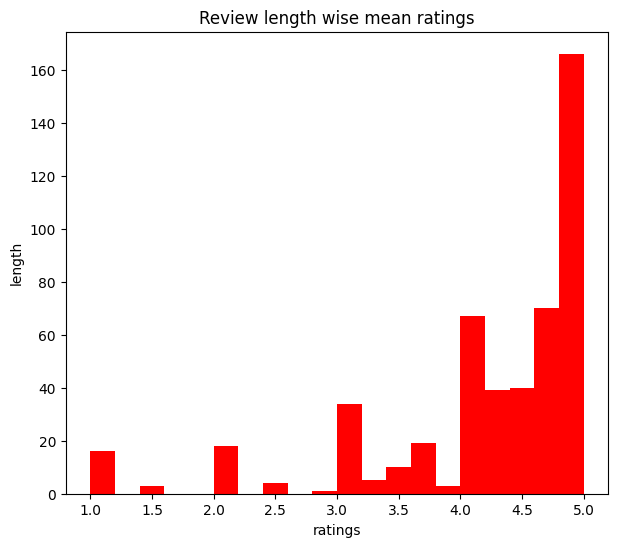

In [30]:
df.groupby('length')['rating'].mean().plot.hist(color='red',figsize=(7,6),bins=20)
plt.title("Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [31]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df['verified_reviews'])



'Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I\'ve purchased. I\'m wor

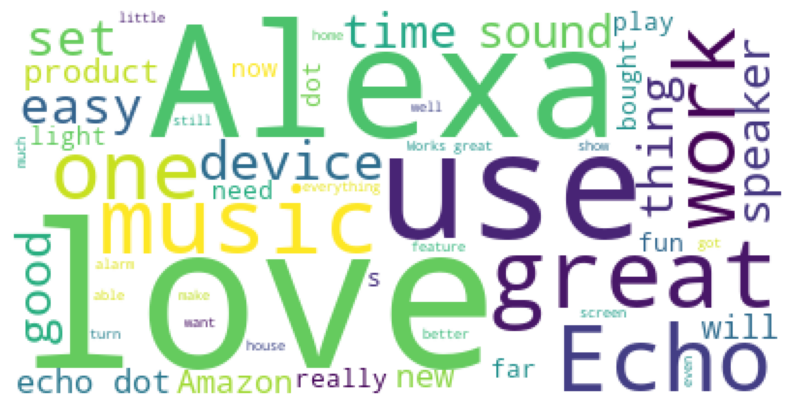

In [32]:
#Combine all reviews

reviews= " ".join([review for review in df['verified_reviews']])
wc=WordCloud(background_color='white',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.axis('off')
reviews


In [33]:
#Combine all reviews for each feedback category and splitting them into individual words

neg_reviews = " ".join([review for review in df[df['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in df[df['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()


unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ". join(unique_neg)

unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos = " ".join(unique_pos)

unique_pos

'echo! "sometimes game, home." yr learns dinosaurs, games categories. well." gift. accessible, do." "without cellphone, ipad alarm. r deaf, bedroom her.it random response. smartbon politics 5th purchased. room house. specifily controlling house. "love listened songs childhood! news, weather, information! great!" 85 dad, talks constantly." learning eveyday! figuring understand. laugh mother knee did.she enjoys do...alexa song, where, cook that!" "love, love, love!!" expected.... hates purchase. toy. household member! learn featues benefits 2nd improvement shorter greater fabric/color choices. ring top, plus/minus buttons. ring w comforting. :) standard usb charger /port round pin. alexa/echo/computer. like? :)" understands commands specific playlists songs spotify. lacking major programs. "we alexa! itunes, podcasts anypod, flash briefing morning. rely custom lists. volume. we\'re we\'ll uses.sometimes we\'re saying." "have days. size, stationed counter intrusive at." plays bedroom, imp

(-0.5, 399.5, 199.5, -0.5)

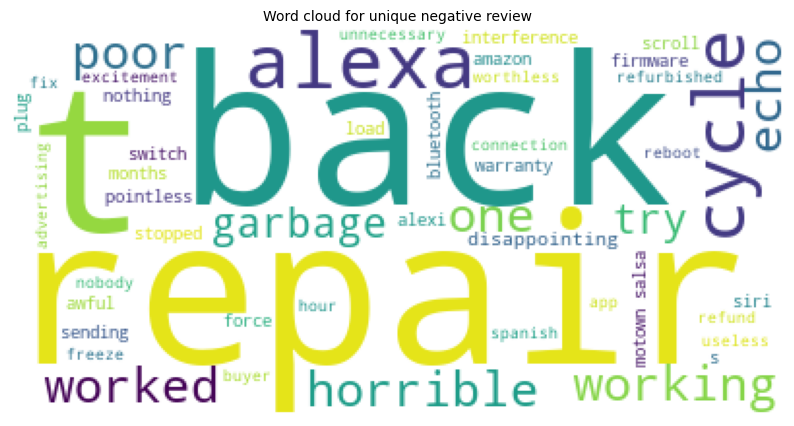

In [34]:
wc=WordCloud(background_color='white',max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.title("Word cloud for unique negative review",fontsize=10)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

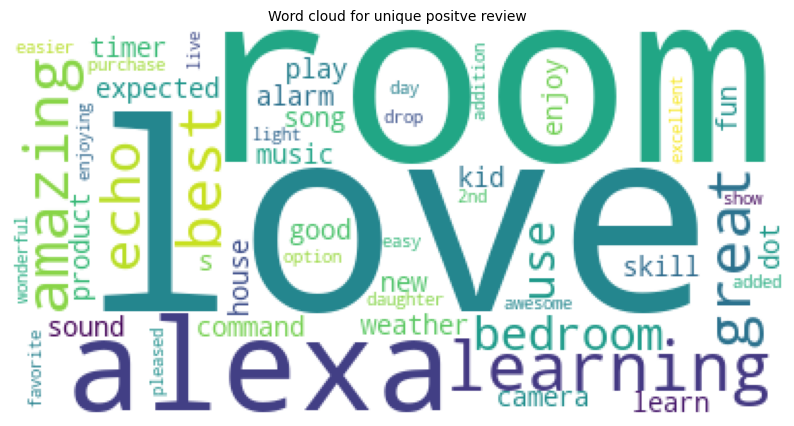

In [35]:
wc=WordCloud(background_color='white',max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_pos))
plt.title("Word cloud for unique positve review",fontsize=10)
plt.axis('off')

Preprocessing and Modeling


To build the corpus from the 'verified_reviews' we perform the following -

1. Replace any non alphabet characters with a space
2. Convert to lower case and split into words
3. Iterate over the individual words and if it not a stopword then add the stemmed form of the word to the corpus



In [58]:
corpus=[]
stemmer=PorterStemmer()

for i in range(0,df.shape[0]):

    review = re.sub('[^a-zA-Z]', " ",df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review =' '.join(review)
    corpus.append(review)
    

corpus
    

  


['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [ ]:
cv=CountVectorizer(max_features=2500)

X=cv.fit_transform(corpus).toarray()
y=df['feedback'].values



array([1, 1, 1, ..., 1, 1, 1])

In [65]:
print(f"Shape of X : {X.shape}")
print(f"Shape of Y : {y.shape}")

Shape of X : (3149, 2500)
Shape of Y : (3149,)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=15)

print(f"X train : {X_train.shape}")
print(f"X test : {X_test.shape}")
print(f"Y train : {Y_train.shape}")
print(f"Y test : {Y_test.shape}")

X train : (2204, 2500)
X test : (945, 2500)
Y train : (2204,)
Y test : (945,)


In [ ]:
print (X_train.max())
print (X_test.max())




12
10


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
scaler=MinMaxScaler()

X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.fit_transform(X_test)





array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
#Random Forest

random_forest=RandomForestClassifier()
random_forest.fit(X_train_scaler,Y_train)

RandomForestClassifier()

In [82]:
print(f"training score",random_forest.score(X_train_scaler,Y_train))
print(f"testing score",random_forest.score(X_test_scaler,Y_test))

training score 0.9945553539019963
testing score 0.9439153439153439


In [84]:
#predicting on the test set
y_preds= random_forest.predict(X_test_scaler)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
cm=confusion_matrix(Y_test,y_preds)
cm

array([[ 33,  45],
       [  8, 859]])

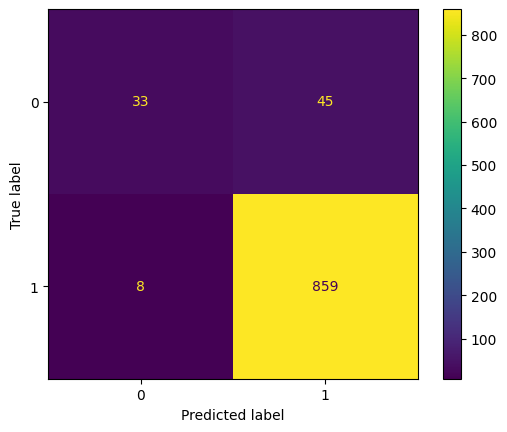

In [87]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
cm_display.plot()
plt.show()